In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip "/content/drive/MyDrive/GENAI/Week3/Day2/globalpowerplantdatabasev130.zip"

Archive:  /content/drive/MyDrive/GENAI/Week3/Day2/globalpowerplantdatabasev130.zip
  inflating: A_Global_Database_of_Power_Plants.pdf  
  inflating: Estimating_Power_Plant_Generation_in_the_Global_Power_Plant_Database.pdf  
  inflating: global_power_plant_database.csv  
  inflating: README.txt              
  inflating: RELEASE_NOTES.txt       


# **1. Data Import and Cleaning:**

In [70]:
import pandas as pd
import numpy as np

In [71]:
plant = pd.read_csv("/content/global_power_plant_database.csv")
df_plant = pd.DataFrame(plant)
df_plant.head()

/tmp/ipython-input-71-1845593393.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  plant = pd.read_csv("/content/global_power_plant_database.csv")


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [72]:
df_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [73]:
df_plant.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [74]:
df_plant.drop_duplicates(inplace=True)

In [75]:
df_plant.shape[0]

34936

In [76]:
df_plant.isnull().mean() * 100

,0
country,0.000000
country_long,0.000000
name,0.000000
gppd_idnr,0.000000
capacity_mw,0.000000
latitude,0.000000
longitude,0.000000
primary_fuel,0.000000
other_fuel1,94.435539
other_fuel2,99.209984


On supprime ces colonnes car elles comportent un trop grand nombre de valeurs nuls


In [77]:
for col in df_plant.columns:
  if df_plant[col].isnull().mean() * 100 > 51:
    df_plant.drop(col, axis=1, inplace=True)

In [78]:
df_plant.drop(["owner", "estimated_generation_gwh_2016", "estimated_generation_gwh_2017"], axis = 1, inplace=True)

In [79]:
df_plant.isnull().mean() * 100

,0
country,0.000000
country_long,0.000000
name,0.000000
gppd_idnr,0.000000
capacity_mw,0.000000
latitude,0.000000
longitude,0.000000
primary_fuel,0.000000
commissioning_year,50.060110
source,0.042936


In [80]:
from sklearn.impute import SimpleImputer

columns_to_impute = ["source", "url", "geolocation_source"]

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df_plant[columns_to_impute])
df_plant_imputed = imputer.transform(df_plant[columns_to_impute])
df_plant[columns_to_impute] = df_plant_imputed

In [81]:
df_plant.dropna(inplace=True)

In [87]:
df_plant["commissioning_year"] = pd.to_datetime(df_plant["commissioning_year"], format="%Y")

In [88]:
df_plant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17447 entries, 9 to 34928
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   country                         17447 non-null  object        
 1   country_long                    17447 non-null  object        
 2   name                            17447 non-null  object        
 3   gppd_idnr                       17447 non-null  object        
 4   capacity_mw                     17447 non-null  float64       
 5   latitude                        17447 non-null  float64       
 6   longitude                       17447 non-null  float64       
 7   primary_fuel                    17447 non-null  object        
 8   commissioning_year              17447 non-null  datetime64[ns]
 9   source                          17447 non-null  object        
 10  url                             17447 non-null  object        
 11  geoloca

# **2. Exploratory Data Analysis:**

In [89]:
df_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
9,ALB,Albania,Bistrica 1,WRI1002169,27.0,39.9116,20.1047,Hydro,1965-01-01,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
10,ALB,Albania,Fierza,WRI1002170,500.0,42.2514,20.0431,Hydro,1978-01-01,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
11,ALB,Albania,Koman,WRI1002171,600.0,42.1033,19.8224,Hydro,1985-01-01,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
12,ALB,Albania,Lanabregas,WRI1002172,5.0,41.3428,19.8964,Hydro,1951-01-01,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
13,ALB,Albania,Shkopet,WRI1002173,24.0,41.6796,19.8305,Hydro,1963-01-01,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [98]:
num_cols = df_plant.select_dtypes(include="float64").columns
stats = df_plant.describe().T
stats["median"] = df_plant[num_cols].median()
stats = stats.T
stats = stats.drop(columns = ["commissioning_year"], axis =1)
stats

,capacity_mw,latitude,longitude
count,17447.0,17447.0,17447.0
mean,218.158764,31.158274,-43.465823
min,1.0,-77.847,-171.7124
25%,4.1,31.0092,-93.72545
50%,21.8,38.0226,-74.0944
75%,138.0,42.55425,4.2483
max,22500.0,71.292,179.3887
std,558.158996,21.249495,72.384331
median,21.8,38.0226,-74.0944


In [99]:
reduced_df_plant = df_plant.loc[:, ["country_long", "primary_fuel", "capacity_mw"]]
grouped_df_plant = reduced_df_plant.groupby(["country_long", "primary_fuel"])["capacity_mw"].sum().reset_index()
pivot_df_plant = grouped_df_plant.pivot(index = "country_long", columns="primary_fuel", values="capacity_mw")
pivot_df_plant.head()

primary_fuel,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wind
country_long,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,1431.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,9548.00,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.600,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,4844.2,NaN,9904.96,NaN,9921.51,1763.0,35.492,1324.46,NaN,NaN,NaN,NaN,NaN
Armenia,NaN,NaN,NaN,271.00,NaN,404.00,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

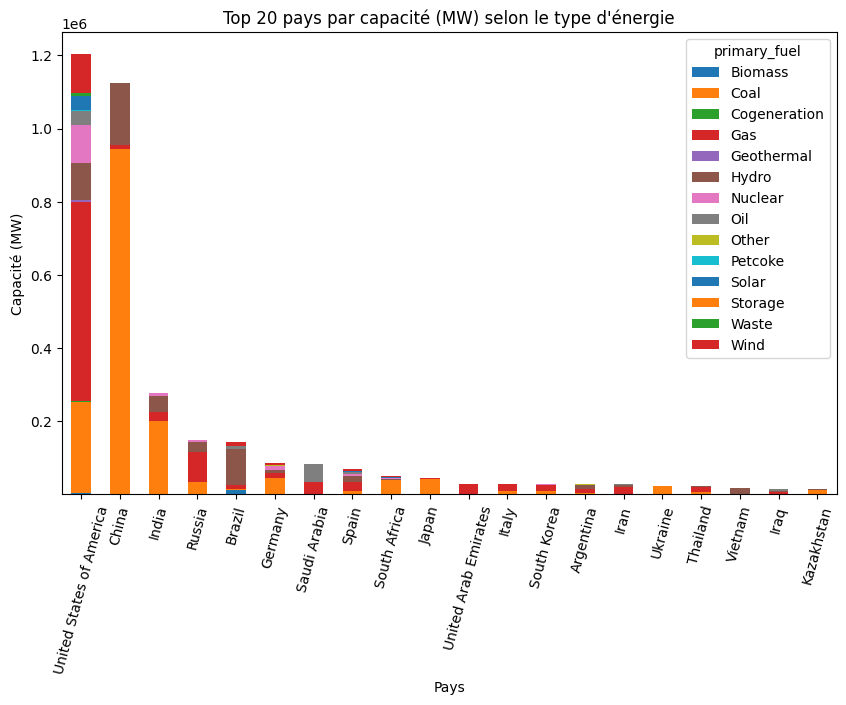

In [101]:
top_20 = pivot_df_plant.sum(axis=1).sort_values(ascending=False).head(20).index
top_20 = pivot_df_plant.loc[top_20]
top_20.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Top 20 pays par capacité (MW) selon le type d'énergie")
plt.xlabel("Pays")
plt.ylabel("Capacité (MW)")
plt.xticks(rotation=75)
plt.show()

# **3. Statistical Analysis:**

In [102]:
statistiques = {
    "fuel_type": [],
    "mean": [],
    "median": [],
    "std": []
}
def stat(fuel):
  statistiques["fuel_type"].append(fuel)
  statistiques["mean"].append(pivot_df_plant[fuel].mean())
  statistiques["median"].append(pivot_df_plant[fuel].median())
  statistiques["std"].append(pivot_df_plant[fuel].std())

In [103]:
for col in pivot_df_plant.columns:
    stat(col)
statistiques = pd.DataFrame(statistiques)
statistiques.set_index("fuel_type", inplace=True)
statistiques = statistiques.T
statistiques

fuel_type,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wind
mean,1593.339308,35149.740020,1042.0,16936.945561,571.961538,9590.794967,9691.43500,3249.555004,672.715000,2361.6,1799.360945,815.6,1159.525400,4365.709727
median,215.000000,3750.000000,1042.0,2795.000000,298.000000,1655.700000,2066.50000,476.250000,609.550000,2361.6,100.000000,815.6,68.153000,241.900000
std,3389.548898,139772.723453,NaN,72366.179593,1040.991862,27448.692377,25397.81935,9812.360501,487.022363,NaN,7525.399394,NaN,3052.402978,18111.359661


In [104]:
pivot_df_plant2 = pivot_df_plant.fillna(0)
df_long = pivot_df_plant2.reset_index().melt(id_vars=["country_long"], var_name="fuel_type", value_name="capacity_mw")
df_long

,country_long,fuel_type,capacity_mw
0,Albania,Biomass,0.0
1,Algeria,Biomass,0.0
2,Antarctica,Biomass,0.0
3,Argentina,Biomass,0.0
4,Armenia,Biomass,0.0
...,...,...,...
1325,Uzbekistan,Wind,0.0
1326,Venezuela,Wind,0.0
1327,Vietnam,Wind,152.0
1328,Yemen,Wind,0.0


In [105]:
grouped_data = [group['capacity_mw'].values for name, group in df_long.groupby('fuel_type')]

In [106]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*grouped_data)

alpha = 0.05
if p_value < alpha:
    print("❌ Rejet de H₀ : la moyenne de puissance varie significativement entre les types de carburant.")
else:
    print("✅ On ne rejette pas H₀ : pas de différence significative détectée entre les moyennes.")

❌ Rejet de H₀ : la moyenne de puissance varie significativement entre les types de carburant.


# **4. Time Series Analysis:**

<Axes: title={'center': 'Evolution du mix énergétique par année'}, xlabel='commissioning_year'>

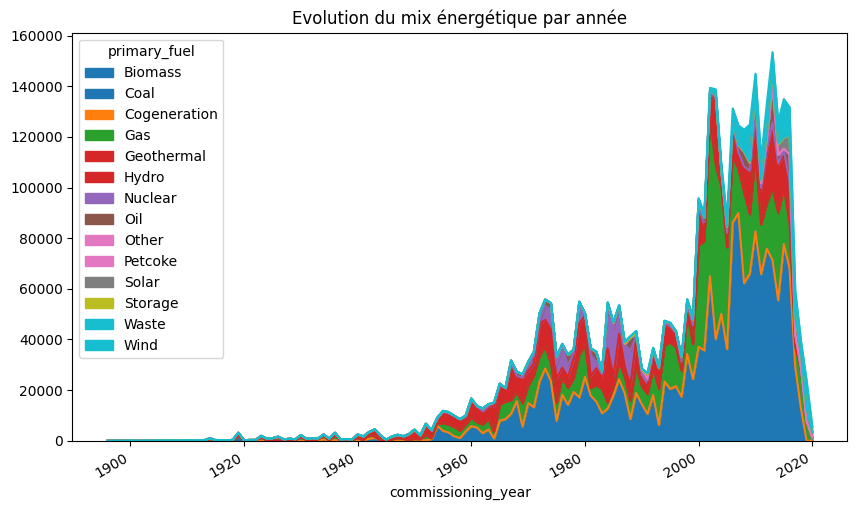

In [117]:
df_plant_trend = df_plant.groupby(["commissioning_year","primary_fuel"])["capacity_mw"].sum().reset_index()
pivot_df_plant_trend = df_plant_trend.pivot(index = "commissioning_year", columns="primary_fuel", values="capacity_mw")
pivot_df_plant_trend.plot(kind='area', figsize=(10, 6), title='Evolution du mix énergétique par année', colormap='tab10')

# **5. Advanced Visualization:**



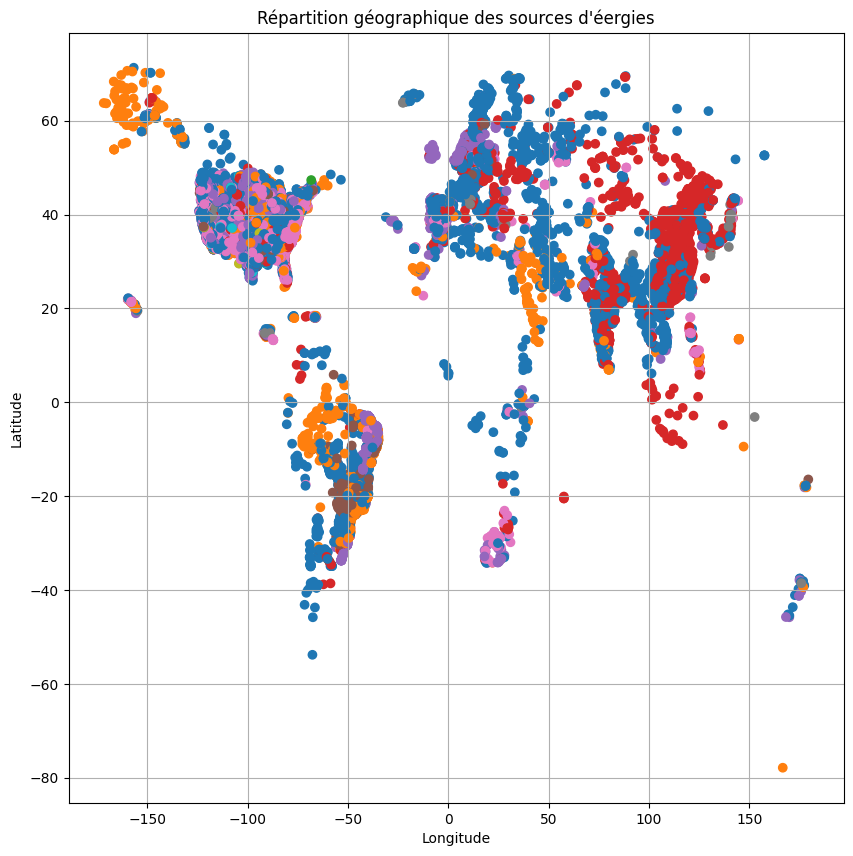

In [128]:
df_plant_trend = df_plant[["latitude", "longitude", "primary_fuel"]]
plt.figure(figsize=(10,10))
codes, labels = pd.factorize(df_plant_trend["primary_fuel"])
plt.scatter(df_plant_trend["longitude"], df_plant_trend["latitude"], c=codes, cmap="tab10")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Répartition géographique des sources d'éergies")
plt.grid(True)
plt.show()